# Research the patterns that determine the success of games

Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from open sources.

We can reveal the regularities that determine the success of the game.

We have data up to 2016. It is necessary to work out the principle of working with data. Data for 2016 may not be complete.

The abbreviation ESRB (Entertainment Software Rating Board) is an association that determines the age rating of computer games in the data set. The ESRB evaluates game content and assigns it to an appropriate age rating, such as Mature, Toddler, or Teen.

Data Description

- Name - the name of the game
- Platform - platform
- Year_of_Release - year of release
- Genre - game genre
- NA_sales - sales in North America (millions of copies sold)
- EU_sales - sales in Europe (millions of copies sold)
- JP_sales - sales in Japan (millions of copies sold)
- Other_sales - sales in other countries (millions of copies sold)
- Critic_Score - Critics score (maximum 100)
- User_Score - user rating (maximum 10)
- Rating — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

## General information

Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy import stats as st

Load the data and save it in a variable

In [2]:
df = pd.read_csv('downloads/games.csv')
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12564,Virtual Chess 64,N64,1998.0,Misc,0.05,0.01,0.00,0.00,NaN,NaN,NaN
9770,Atelier Sophie: The Alchemist of the Mysteriou...,PS4,2015.0,Role-Playing,0.03,0.02,0.06,0.01,75.0,8.1,NaN
5699,BlazBlue: Continuum Shift,X360,2010.0,Fighting,0.23,0.04,0.02,0.02,85.0,8.7,T
8294,Super Robot Taisen Compact 2 Dai-1-Bu,WS,2000.0,Strategy,0.00,0.00,0.17,0.00,NaN,NaN,NaN
2885,Madden NFL 09,PSP,2008.0,Sports,0.65,0.00,0.00,0.06,68.0,6.5,E
1270,Dead Rising 2,X360,2010.0,Action,0.75,0.52,0.09,0.12,79.0,6.9,M
14468,Otomedius Gorgeous,X360,2008.0,Shooter,0.00,0.00,0.03,0.00,NaN,NaN,NaN
10493,Top Gun: Combat Zones,GBA,2004.0,Simulation,0.07,0.03,0.00,0.00,NaN,NaN,NaN
4520,Just Dance 4,PS3,2012.0,Misc,0.26,0.11,0.00,0.06,77.0,7.1,E10+
8029,AirForce Delta Storm,XB,2001.0,Shooter,0.14,0.04,0.00,0.01,61.0,7.1,E


Let's see the general information about the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Let's get  a first look of the statistical characteristics.

In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Columns with the year of issue, rating and rating have gaps.

## Data preparation

Let's replace the column names - bring them to lower case

In [5]:
df.columns = df.columns.str.lower()

Consider gaps in columns

In [6]:
df[
    (df['user_score'].isna()) |
    (df['user_score'] == 'tbd') |
    (df['critic_score'].isna()) |
    (df['rating'].isna())
].groupby('platform').agg(
    {'name':'count'}
).sort_values('name', ascending=False).head(10)

,name
platform,
DS,1683
PS,1044
PS2,1000
Wii,829
PSP,816
GBA,581
PS3,548
X360,385
3DS,363


Most of the passes are in the "old" platforms. Perhaps there were difficulties in collecting information about ratings and ratings in the past, or they were not "rated" in all regions

In [7]:
display(df[df['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Two lines with unnamed games can be omitted from the dataset, as they are useless for further analysis. They also lack data on genre and ratings. The gaps in the column with the year of release of the game are less than two percent, they can also be removed

In [8]:
df = df.dropna(subset=['name', 'year_of_release'])

'Year_of_release' can be converted to 'int', 'score' and'sales' remain in the 'float' format

In [9]:
df['year_of_release'] = df['year_of_release'].astype('int')

We will not fill in the gaps in the columns with ratings and ratings - there are too many of them to do it "manually", and "automatic" options will give a distorted result. Some gaps in ratings may have been due to the unpopularity of the game in a particular region. Gaps in the rating will appear if the rating criteria in different regions are different, for example.

In the column with user ratings, there are values "tbd" (to be discuss). They can be equated with "NaN", such games are underestimated

In [10]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Let's calculate the total sales in all regions and write them in a separate column

In [11]:
df.insert(8, 'world_sales', df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'])
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,world_sales,critic_score,user_score,rating
4717,Top Spin 4,X360,2011,Sports,0.15,0.22,0.00,0.04,0.41,84.0,8.2,E
6878,Zumba Fitness: World Party,XOne,2013,Misc,0.17,0.05,0.00,0.02,0.24,73.0,6.2,E
2607,The Sims 2: Castaway,PSP,2007,Simulation,0.08,0.46,0.00,0.25,0.79,64.0,7.3,E10+
923,WCW Nitro,PS,1998,Fighting,1.42,0.36,0.03,0.07,1.88,NaN,NaN,NaN
278,FIFA 12,X360,2011,Sports,0.84,2.78,0.02,0.53,4.17,NaN,NaN,NaN
6431,Panzer Dragoon Orta,XB,2002,Shooter,0.16,0.05,0.04,0.01,0.26,90.0,8.5,T
7656,SpongeBob SquarePants: Revenge of the Flying D...,GC,2002,Platform,0.15,0.04,0.00,0.01,0.20,66.0,8.3,E
709,Battlefield 1,XOne,2016,Shooter,1.28,0.77,0.00,0.20,2.25,87.0,8.2,M
6154,Syphon Filter: Dark Mirror,PS2,2007,Shooter,0.14,0.11,0.00,0.04,0.29,70.0,7.8,T
6442,Shin Megami Tensei: Devil Survivor,DS,2009,Role-Playing,0.13,0.00,0.12,0.01,0.26,84.0,8.8,T


## Research data analysis

Let's see how many games were released in different years

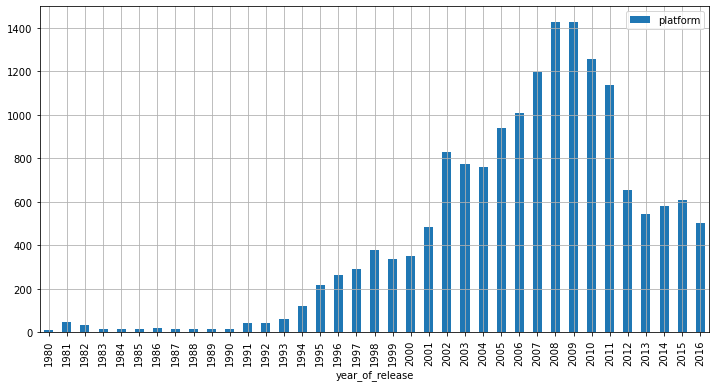

In [12]:
df.pivot_table(
    index='year_of_release', values='platform', aggfunc='count'
).plot(kind='bar', grid=True, figsize=(12, 6));

In the eighties and nineties, too few games were released, since 2002 there has been a sharp jump in number, but since 2012 there has been a decline. Perhaps from the "quantity" of the company releasing games switched to "quality".

Let's see how sales changed by platform

In [13]:
sales_all = df.pivot_table(
    index='platform', values='world_sales', aggfunc='sum'
).reset_index().sort_values('world_sales', ascending=False).head()
sales_all

,platform,world_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


The platforms with the highest total sales are PlayStation, Xbox and Nintendo. Let's build the distribution by years for these platforms

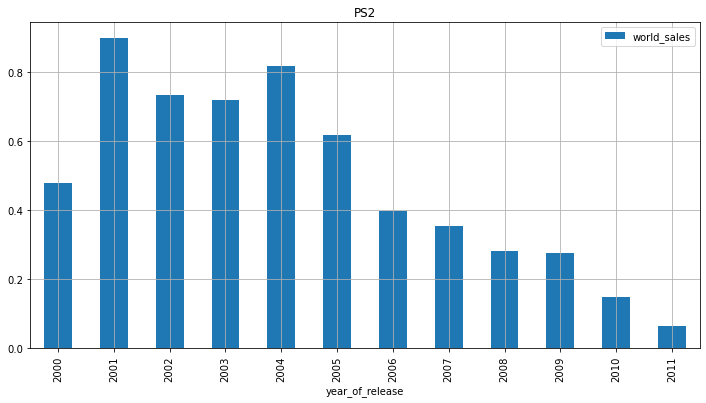

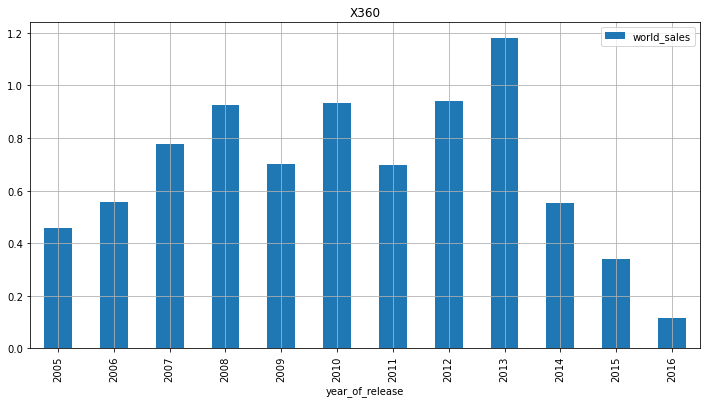

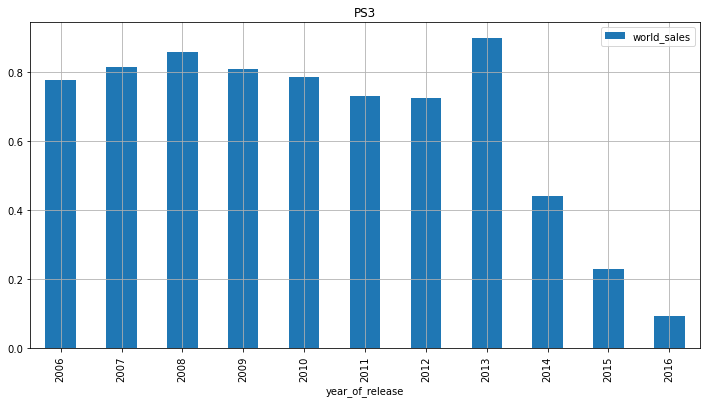

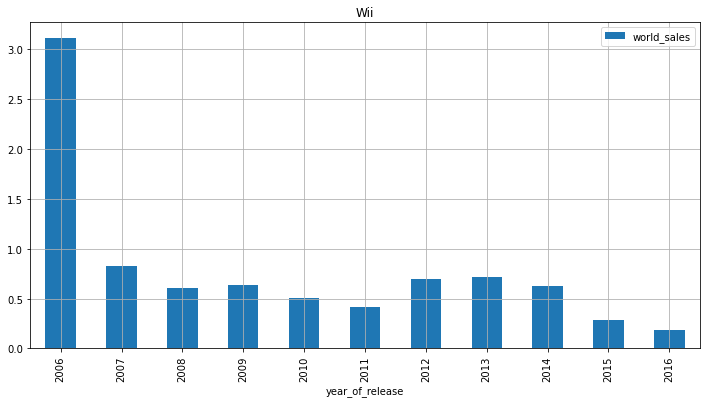

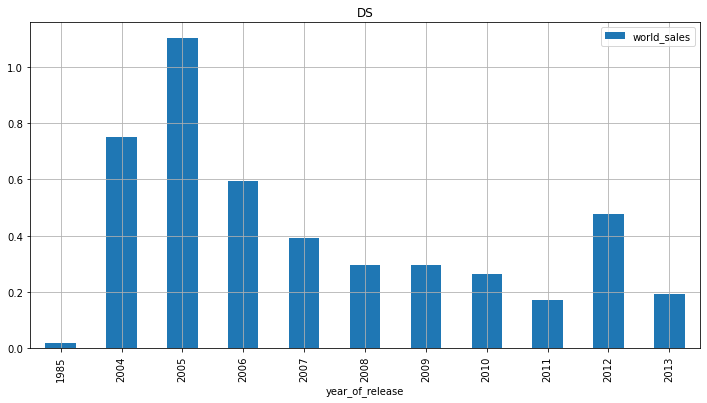

In [14]:
for item in sales_all['platform']:
    df[df['platform'] == item].pivot_table(
        index=['year_of_release'], values='world_sales'
    ).plot(kind='bar', legend=item, grid=True, figsize=(12, 6))
    plt.title(item)
    plt.show()

Judging by the graphs obtained, we can see that the PlayStation released games for 10 years for each of its first three consoles, Nintendo and Xbox have a similar period, the difference is only in total sales. In 2006, the Nintendo Wii made a big jump, but in subsequent years, sales dropped sharply and further evenly distributed. With the advent of the new, old platforms do not immediately disappear. Some time they "go in parallel".

Let's take data for a short period prior to 2017 in order to build a forecast for it. We will consider the period 2014-2016 as relevant. It makes no sense to include earlier years, because the gaming industry is developing very dynamically and it is worth relying only on "modern" data

In [15]:
df_actual = df[df['year_of_release'] >= 2014]

Let's choose a few potentially profitable platforms

In [16]:
sales = df_actual.pivot_table(
    index='platform', values='world_sales', aggfunc='sum'
).sort_values('world_sales', ascending=False)
sales

,world_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


In "our" time period, only 10 platforms remained.
The most profitable was PlayStaton - it met on the first, fourth, eighth and tenth places. Then comes the Xbox - second and fifth place. Nintendo met in third, sixth and ninth places. There are also games on personal computers on the list, but compared to game consoles, they do not "stand" the competition.

Based on the previous findings, we can say that the first three platforms are worth considering. The next ones on the list are previous generations that "live out their lives" in parallel with modern counterparts (or portable versions).

Let's plot a swing chart of global game sales by these platforms

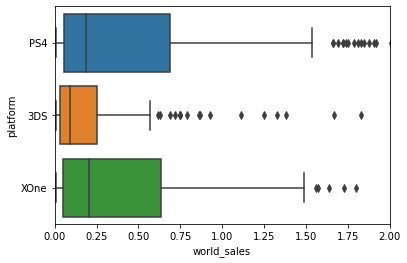

In [17]:
names = {'PS4', 'XOne', '3DS'}
df_actual = df_actual.query('platform in @names')
plt.xlim(0, 2)
sns.boxplot(data=df_actual, x='world_sales', y='platform');

Now it has become clear that almost the entire gaming market is divided between two platforms. The PlayStation leads in sales, although the median is slightly less than the Xbox.

Let's see how the reviews of users and critics affect sales within the PlayStation. Let's build a scatterplot and calculate the correlation between reviews and sales

0.40266141068104083


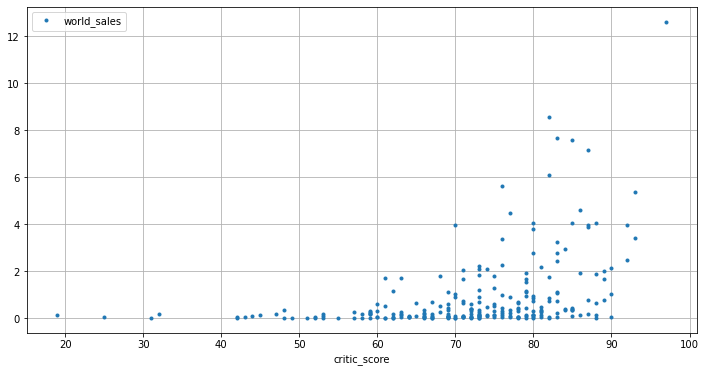

In [18]:
df_actual_ps = df_actual.query('platform == "PS4"')
df_actual_ps.plot(x='critic_score', y='world_sales', style='.', grid=True, figsize=(12, 6))
print(df_actual_ps['critic_score'].corr(df_actual_ps['world_sales']))

-0.040131589472697356


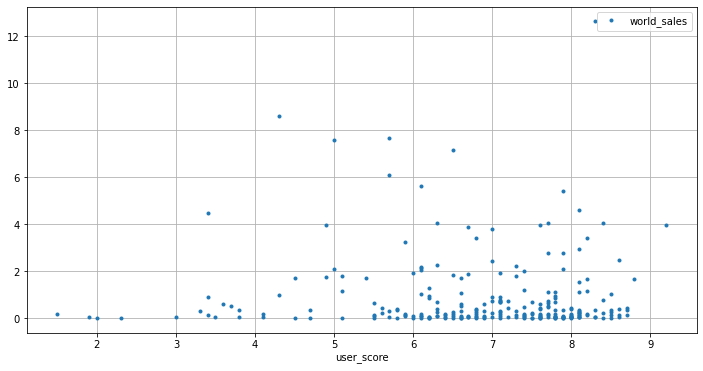

In [19]:
df_actual_ps.plot(x='user_score', y='world_sales', style='.', grid=True, figsize=(12, 6))
print(df_actual_ps['user_score'].corr(df_actual_ps['world_sales']))

Critical reviews and overall PlayStation sales have some direct correlation. But user reviews have a very weak correlation with sales.

Let's check the interdependence with sales of games on other platforms

0.42867694370333226


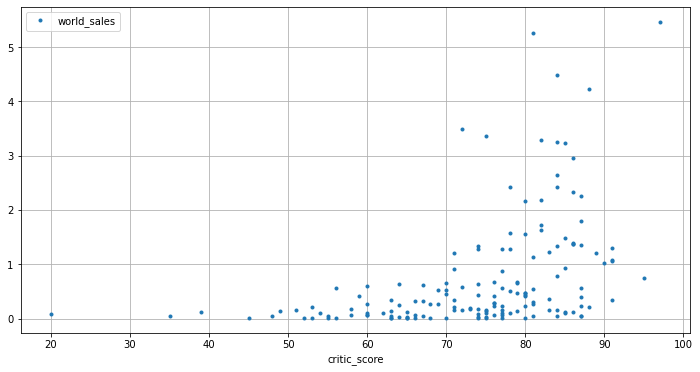

In [20]:
df_actual_x = df_actual.query('platform == "XOne"')
df_actual_x.plot(x='critic_score', y='world_sales', style='.', grid=True, figsize=(12, 6))
print(df_actual_x['critic_score'].corr(df_actual_x['world_sales']))

-0.0703839280647581


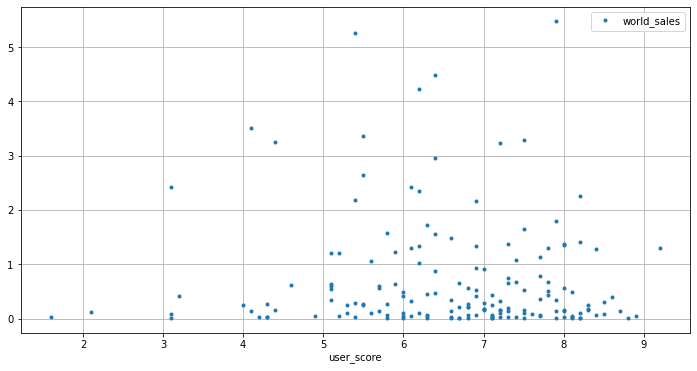

In [21]:
df_actual_x.plot(x='user_score', y='world_sales', style='.', grid=True, figsize=(12, 6))
print(df_actual_x['user_score'].corr(df_actual_x['world_sales']))

The correlation coefficient of XOne game sales is slightly higher for critics and even lower for users

0.314117492869051


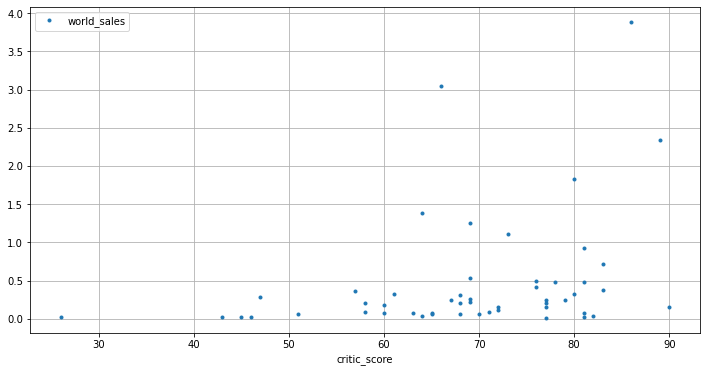

In [22]:
df_actual_ds = df_actual.query('platform == "3DS"')
df_actual_ds.plot(x='critic_score', y='world_sales', style='.', grid=True, figsize=(12, 6))
print(df_actual_ds['critic_score'].corr(df_actual_ds['world_sales']))

0.2151932718527028


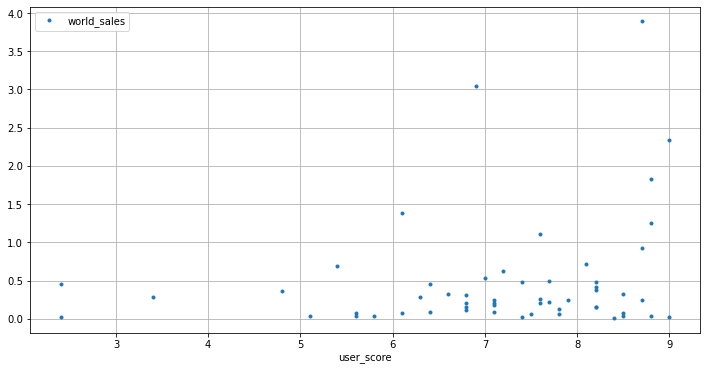

In [23]:
df_actual_ds.plot(x='user_score', y='world_sales', style='.', grid=True, figsize=(12, 6))
print(df_actual_ds['user_score'].corr(df_actual_ds['world_sales']))

In terms of game sales on Nintendo, the correlation coefficient is slightly lower in the case of critics, but slightly more significant in the case of users. That is, there is a small direct correlation, unlike this indicator for other platforms.

Let's look at the general distribution of games by genre

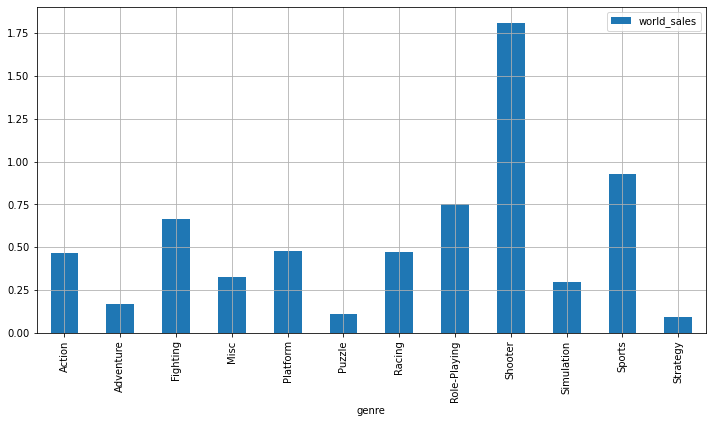

In [24]:
df_actual.pivot_table(index=['genre'], values='world_sales').plot(kind='bar', grid=True, figsize=(12, 6));

The most profitable genre is Shooter. It really stands out from other genres

## User portrait of each region

Let's define a user profile for each region (NA, EU, JP)

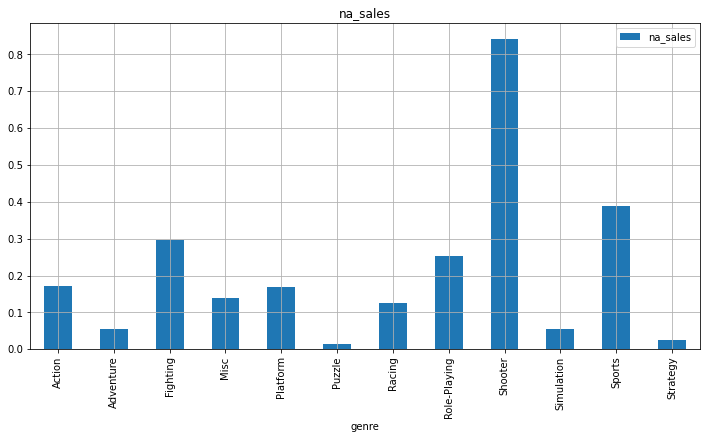

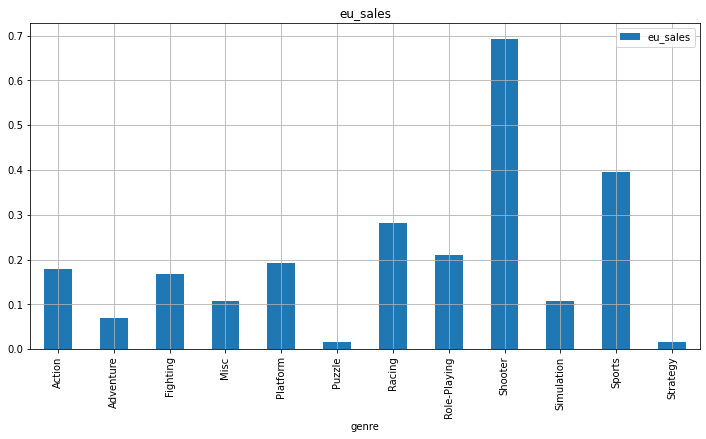

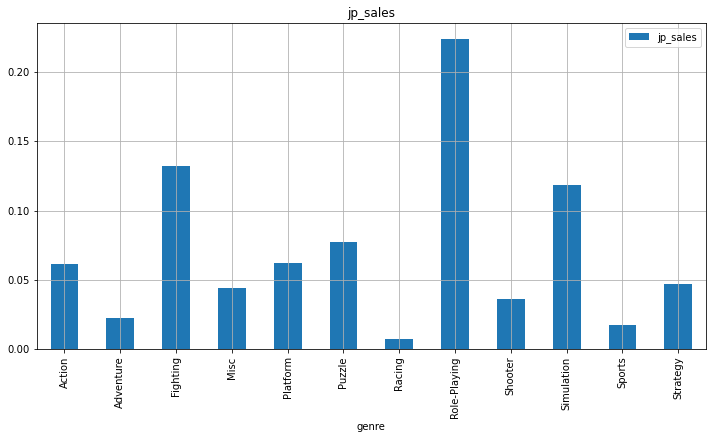

In [25]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    df_actual.pivot_table(
        index=['genre'], values=column
    ).plot(kind='bar', legend=item, grid=True, figsize=(12, 6))
    plt.title(column)
    plt.show()

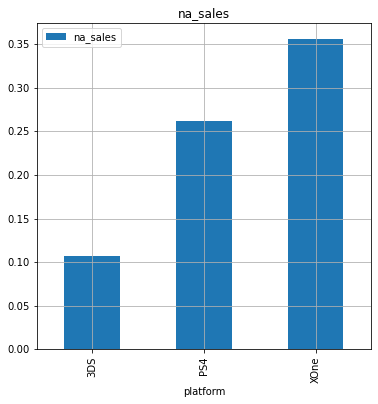

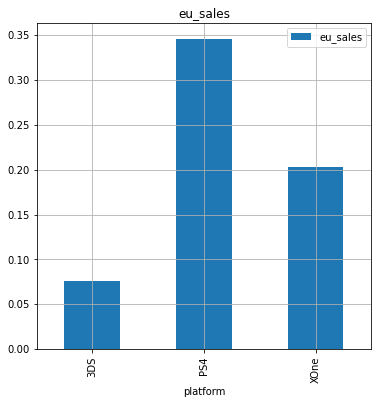

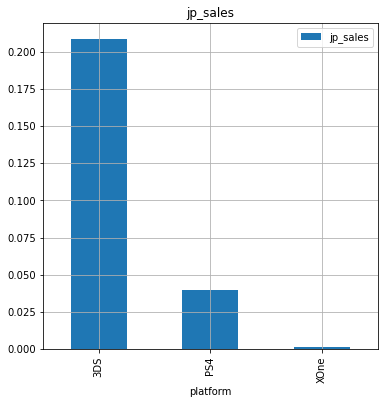

In [26]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    df_actual.pivot_table(
        index=['platform'], values=column
    ).plot(kind='bar', legend=item, grid=True, figsize=(6, 6))
    plt.title(column)
    plt.show()

In America and Europe, sales of games in the Shooter genre are much higher than all others, while in Japan they are not so popular, they buy more role-playing games there.

Platform preferences vary from region to region: in America, a significant proportion of users play on XOne, slightly less on PS; in Europe most on PS, almost half as much on XOne; and in Japan, these platforms are not popular, they play on the 3DS.

Let's see if the rating affects sales volumes by region

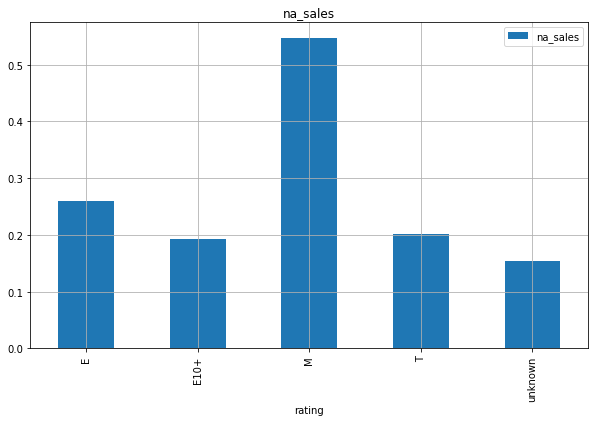

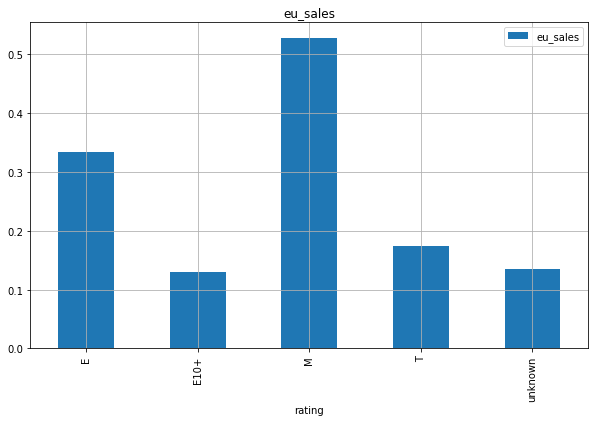

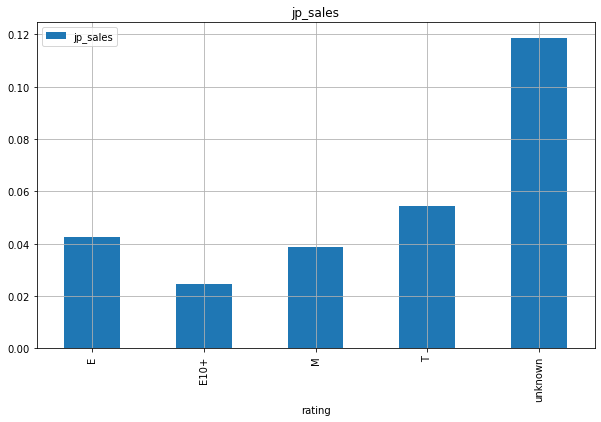

In [27]:
df_actual['rating'] = df_actual['rating'].fillna('unknown')
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    df_actual.pivot_table(
        index=['rating'], values=column
    ).plot(kind='bar', legend=item, grid=True, figsize=(10, 6))
    plt.title(column)
    plt.show()

The ESRB rating affects sales in America and Europe in the same way, there are more sales of games with an M rating. In Japan, the vast majority of sales are with an indeterminate rating. This is due to the fact that the ESRB rating system is American, Japan has its own system.

## Hypothesis testing

Let's build and test a hypothesis about the user ratings of the XOne and PS platforms.

Null hypothesis: The average user ratings of the XOne and PS platforms are the same.

Alternative hypothesis: the average user ratings of the XOne and PS platforms are different.

Samples vary in size and are normally distributed. We will use a two-sided T-test with unequal variances. First, we will remove the missing values of user ratings from the sample so that this does not distort the analysis

In [28]:
df_actual_user = df_actual.dropna(subset=['user_score'])
results = st.ttest_ind(
    df_actual_user[df_actual_user['platform'] == 'PS4']['user_score'],
    df_actual_user[df_actual_user['platform'] == 'XOne']['user_score'],
    equal_var = False)

print('p-value:', results.pvalue)
if results.pvalue < .05:
    print("Reject the null hypothesis")
else:
    print("Not possible to reject the null hypothesis")

p-value: 0.09571225278268487
Not possible to reject the null hypothesis


In this case, the difference statistic is greater than the statistical significance. The probability of accidentally getting this or more difference is almost 10%. This is clearly too high a probability to conclude that there is a significant difference between the averages. That is, the averages for the PS4 and XOne platforms differ slightly.

Let's build and test a hypothesis about the user ratings of the Action and Sports genres.

Null Hypothesis: The average user ratings for the Action and Sports genres are the same.

Alternative hypothesis: the average user rating of the Action genre is less than the rating of the Sports genre.

Samples vary in size and are normally distributed. We will use a one-sided T-test with unequal variances

In [29]:
results = st.ttest_ind(
    df_actual[df_actual['genre'] == 'Action']['user_score'],
    df_actual[df_actual['genre'] == 'Sports']['user_score'],
    equal_var = False)

print('p-value:', results.pvalue)
if results.pvalue < .05:
    print("Reject the null hypothesis")
else:
    print("Not possible to reject the null hypothesis")

p-value: nan
Not possible to reject the null hypothesis


The value of the difference statistics in the case of different genres is less than the statistical significance. The difference between these values ​​is quite large, that is, the probability of getting it by chance is very low. Here you can judge a significant difference between the Action and Sports genres. Sports is generally more popular than Action

## General conclusion

Gaming platforms are developing quite quickly and it makes no sense to build forecasts based on a long period, a couple of years is enough. In recent years, there are not many platforms left and the most popular ones are the PlayStation in Europe, the Xbox in America and the Nintendo in Japan. You can rely on the ESRB rating system in America and Europe, for Japan you need to consider another option.

Based on the data obtained, we can say that there is no universal "product" in the gaming industry. Everything depends on different factors. For example, from the sales market: if you focus on the European audience, then, most likely, you should start playing Shooter games for the PlayStation game console. In the Japanese market, teen role-playing games for the Nintendo are particularly popular.